In [2]:
import Pkg
Pkg.activate(".")

  Activating new project at `C:\Users\asus`


In [81]:
Pkg.add(["Random","LinearAlgebra","Plots","Distributions","Statistics","PyPlot"])

   Resolving package versions...
   Installed PyPlot ─ v2.11.5
   Installed PyCall ─ v1.96.4
    Updating `C:\Users\asus\Project.toml`
  [d330b81b] + PyPlot v2.11.5
    Updating `C:\Users\asus\Manifest.toml`
  [8f4d0f93] + Conda v1.10.2
  [438e738f] + PyCall v1.96.4
  [d330b81b] + PyPlot v2.11.5
  [81def892] + VersionParsing v1.3.0
    Building PyCall → `C:\Users\asus\.julia\scratchspaces\44cfe95a-1eb2-52ea-b672-e2afdf69b78f\9816a3826b0ebf49ab4926e2b18842ad8b5c8f04\build.log`
Precompiling project...
  ✓ PyCall
  ✓ PyPlot
  2 dependencies successfully precompiled in 14 seconds. 174 already precompiled.


In [8]:
using Random, LinearAlgebra, Plots, Distributions

In [32]:
nd = Normal(0,1)

Normal{Float64}(μ=0.0, σ=1.0)

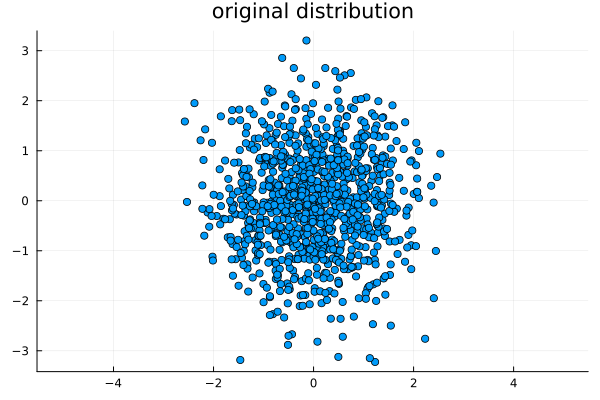

In [33]:
# forming the distribution
data = rand(nd, (1000, 2))
scatter(data[:,1], data[:,2], legend = nothing, aspect_ratio = :equal, title="original distribution")

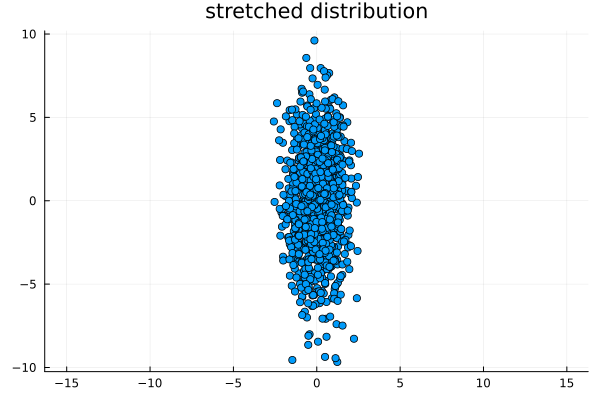

In [34]:
# stretching
data_str = data
data_str[:,2] = data[:,2]*3
scatter(data_str[:,1], data_str[:,2], legend = nothing, aspect_ratio = :equal,title = "stretched distribution")

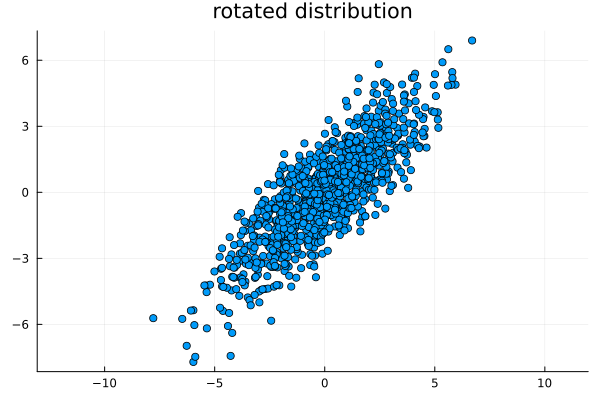

In [35]:
# rotation
θ = π/4
r = [cos(θ) -sin(θ);sin(θ) cos(θ)]
data_rot = data_str * r
scatter(data_rot[:,1], data_rot[:,2], legend = nothing, aspect_ratio = :equal, title = "rotated distribution")

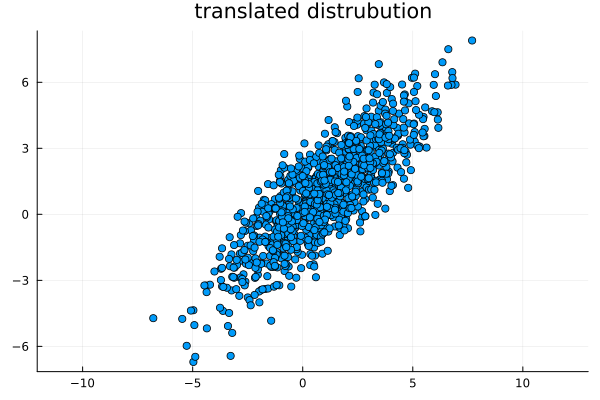

In [36]:
# translation
t = [1 1]
data_tr= data_rot .+ t
scatter(data_tr[:,1], data_tr[:,2], legend = nothing, aspect_ratio = :equal, title = "translated distrubution")

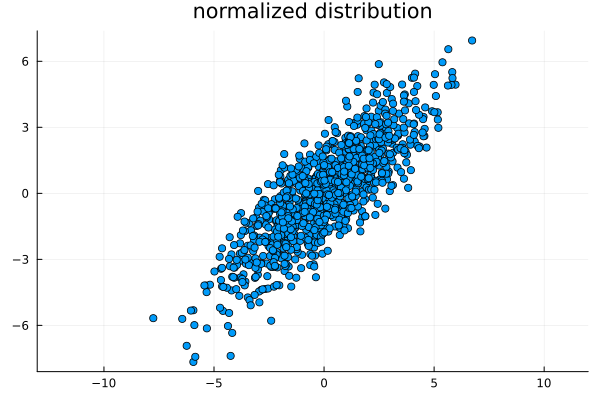

In [38]:
# normalization
data_mean = mean(data_tr, dims=1)
data_norm = data_tr .- data_mean
scatter(data_norm[:,1], data_norm[:,2], legend = nothing, aspect_ratio = :equal, title = "normalized distribution")

In [136]:
# SVD
u, s, v = svd(data_norm/sqrt(1000))
Σ = diagm(s)

2×2 Matrix{Float64}:
 3.05463  0.0
 0.0      0.94061

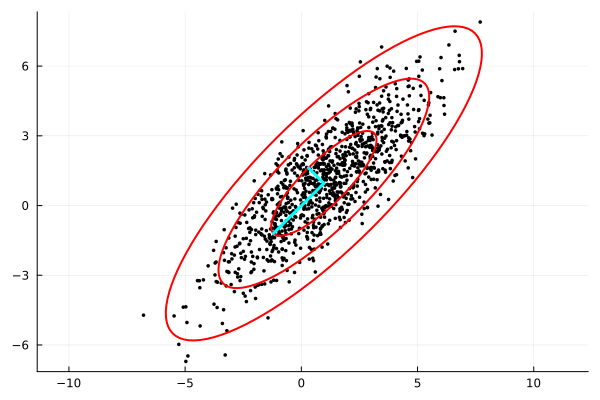

In [198]:
ϕ = (0:0.01:1)*2*π
fig = scatter(data_tr[:,1], data_tr[:,2], legend = nothing, aspect_ratio = :equal, markersize = 2, color = :black)
for i in 1:3
    data_std = i * hcat(cos.(ϕ),sin.(ϕ)) * Σ * v'
    plot!(fig, data_mean[1] .+ data_std[:,1], data_mean[2] .+ data_std[:,2], legend = nothing , color = :red, linewidth = 2, aspect_ratio = :equal)
end
x = 0:0.1:1
y = zeros(11,1)
xy = hcat(x,y)
xy1 = s[1] * xy * v'
r = [0 -1;1 0]
xy2 = xy * s[2] * v' * r
plot!(fig, data_mean[1] .+ xy1[:,1] , data_mean[2] .+  xy1[:,2], legend = nothing , color = :cyan, linewidth = 3, aspect_ratio = :equal)
plot!(fig, data_mean[1] .+ xy2[:,1], data_mean[2] .+  xy2[:,2], legend = nothing , color = :cyan, linewidth = 3, aspect_ratio = :equal)
display(fig)

In [199]:
# PCA
C = 1/(1000-1) * transpose(data_norm) * data_norm
D = transpose(v) * C * v
display(C)
display(D)

2×2 Matrix{Float64}:
 5.1437   4.22713
 4.22713  5.08206

2×2 Matrix{Float64}:
 9.34012      1.77636e-15
 8.32667e-16  0.885632